# Experimento 3: _GridSearch_ no SVM

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

## Busca em grade

In [2]:
fs13_df = pd.read_csv('./csvs/fs13.csv')
target_s = fs13_df.pop('target')

param_grid_1 = {'svc__C':[1, 10, 100, 1000],
                'svc__gamma':['auto', 0.001, 0.01, 0.1, 0.25, 0.5, 1, 1.5]}

results_1 = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            SVC(cache_size=500)),
    param_grid=param_grid_1,
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=10,
                       shuffle=True)
    ).fit(
        X=fs13_df.values,
        y=target_s.values
        ).cv_results_

results_1_df = pd.DataFrame(results_1)
results_1_df.to_csv('./csvs/04-gs_svm-1.csv')

param_svc__C,param_svc__gamma,mean_test_score,std_test_score,rank_test_score
1,auto,0.789269,0.021312,25
1,0.001000,0.460058,0.015041,32
1,0.010000,0.494792,0.022546,31
1,0.100000,0.759557,0.021368,26
1,0.250000,0.858741,0.013952,23
1,0.500000,0.918178,0.005411,20
1,1,0.960252,0.009113,17
1,1.500000,0.964886,0.009487,15
10,auto,0.925512,0.007325,19
10,0.001000,0.496717,0.021218,30


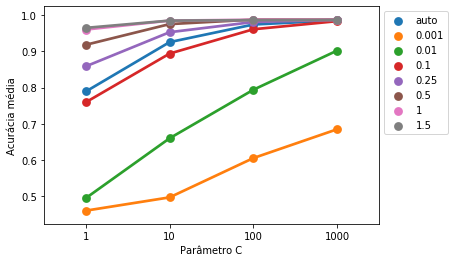

In [3]:
sns.pointplot(
    data=results_1_df,
    x='param_svc__C',
    y='mean_test_score',
    hue='param_svc__gamma',
    ).set(
        xlabel='Parâmetro C',
        ylabel='Acurácia média')

plt.legend(bbox_to_anchor=(1, 1))

results_1_df[[
    'param_svc__C',
    'param_svc__gamma',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index().background_gradient(cmap='Blues_r', subset=['rank_test_score'])

# Experimento 4: expandindo intervalo da busca em grade

In [4]:
param_grid_2 = {'svc__C':[100, 1000, 10_000, 100_000],
                'svc__gamma':np.around(np.arange(0.5, 1.5, 0.1), 3)}

results_2 = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            SVC(cache_size=500)),
    param_grid=param_grid_2,
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=10,
                       shuffle=True)
    ).fit(
        X=fs13_df.values,
        y=target_s.values
        ).cv_results_

results_2_df = pd.DataFrame(results_2)
results_2_df.to_csv('./csvs/04-gs_svm-2.csv')

param_svc__C,param_svc__gamma,mean_test_score,std_test_score,rank_test_score
100,0.500000,0.987648,0.005125,4
100,0.600000,0.988035,0.005308,1
100,0.700000,0.987649,0.006178,3
100,0.800000,0.987263,0.005995,5
100,0.900000,0.986877,0.006951,7
100,1.000000,0.986491,0.007577,8
100,1.100000,0.986491,0.008146,8
100,1.200000,0.986105,0.008318,12
100,1.300000,0.986491,0.008678,8
100,1.400000,0.986491,0.007771,8


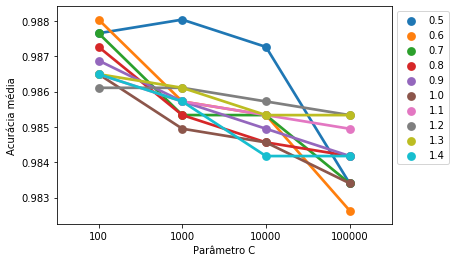

In [5]:
sns.pointplot(
    data=results_2_df,
    x='param_svc__C',
    y='mean_test_score',
    hue='param_svc__gamma',
    ).set(
        xlabel='Parâmetro C',
        ylabel='Acurácia média')

plt.legend(bbox_to_anchor=(1, 1))

results_2_df[[
    'param_svc__C',
    'param_svc__gamma',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index().background_gradient(cmap='Blues_r', subset=['rank_test_score'])

# Experimento 5: Restringindo intervalos

No experimento 4, nota-se que os melhores desempenhos ocorrem com `gamma` entre 0.5 e 1, e também com `C` em um valor acima de 1000.

In [6]:
param_grid_3 = {'svc__C':np.arange(50, 550, 50),
                'svc__gamma':np.around(np.arange(0.5, 1.1, 0.1), 3)}

results_3 = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            SVC(cache_size=500)),
    param_grid=param_grid_3,
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=10,
                       shuffle=True)
    ).fit(
        X=fs13_df.values,
        y=target_s.values
        ).cv_results_

results_3_df = pd.DataFrame(results_3)
results_3_df.to_csv('./csvs/04-gs_svm-3.csv')

param_svc__C,param_svc__gamma,mean_test_score,std_test_score,rank_test_score
50,0.500000,0.985716,0.008815,47
50,0.600000,0.986102,0.008670,41
50,0.700000,0.985716,0.009777,47
50,0.800000,0.986103,0.010246,40
50,0.900000,0.986489,0.009340,31
50,1.000000,0.986489,0.009807,31
50,1.100000,0.986489,0.009807,31
100,0.500000,0.988034,0.008712,4
100,0.600000,0.987648,0.008600,12
100,0.700000,0.987646,0.008772,14


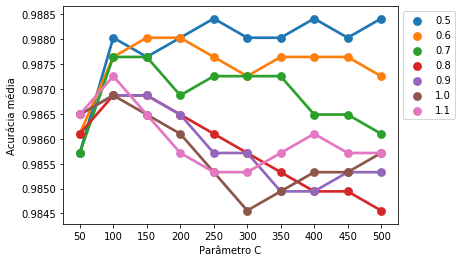

In [7]:
sns.pointplot(
    data=results_3_df,
    x='param_svc__C',
    y='mean_test_score',
    hue='param_svc__gamma'
    ).set(
        xlabel='Parâmetro C',   
        ylabel='Acurácia média')

plt.legend(bbox_to_anchor=(1, 1))

results_3_df[[
    'param_svc__C',
    'param_svc__gamma',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index().background_gradient(cmap='Blues_r', subset=['rank_test_score'])

## Busca final

In [10]:
results_4 = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            SVC(gamma=0.5, cache_size=500)),
    param_grid={'svc__C':np.arange(100, 500, 50)},
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=10,
                       shuffle=True)
    ).fit(
        X=fs13_df.values,
        y=target_s.values
        ).cv_results_

results_4_df = pd.DataFrame(results_4)

param_svc__C,mean_test_score,std_test_score,rank_test_score
100,0.986497,0.006722,8
150,0.987268,0.006223,7
200,0.988040,0.006549,6
250,0.988041,0.007788,5
300,0.988427,0.007701,3
350,0.988427,0.007505,3
400,0.988812,0.006771,1
450,0.988812,0.006771,1


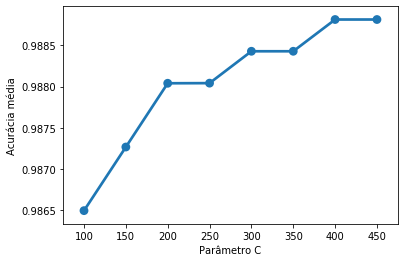

In [11]:
sns.pointplot(
    data=results_4_df,
    x='param_svc__C',
    y='mean_test_score',
    ).set(
        xlabel='Parâmetro C',
        ylabel='Acurácia média')

results_4_df[[
    'param_svc__C',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index().background_gradient(cmap='Blues_r', subset=['rank_test_score'])